In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [2]:
0.8 * 0.8 * 30

19.200000000000003

In [2]:
from enum import Enum

In [3]:
class Point:
    def __init__(self):
        self.x = None
        self.y = None
        self.z = None

        self.id = None


In [4]:
class CLASSIFIED_STATUS(Enum):
    SUCCESS = 0
    UNCLASSIFIED = -1
    NOISE = -2
    FAILURE = -3

class POINT_STATUS(Enum):
    CORE_POINT      = 1
    BORDER_POINT    = 2
    OTHER           = 0


In [120]:
class DBSCAN:
    def __init__(self, points, min_points_th, max_points_th, eps):
        self.__min_points_th    = min_points_th
        self.__epsiron          = eps
        self.__points           = points
        self.__points_size      = len(points)

        self.__max_points_th    = max_points_th

        self.__cluster_size     = None

        
    
    def Run(self):
        cluster_id = 1

        for point in self.__points:
            if point.cluster_id == CLASSIFIED_STATUS.UNCLASSIFIED:
                if self.ExpandCluster(point, cluster_id) != CLASSIFIED_STATUS.FAILURE:
                    cluster_id = cluster_id + 1
        self.__cluster_size = cluster_id
        return(cluster_id)

    def CalcurateCluster(self, point):
        cluster_index = []
        index = 0
        for p in self.__points:
            if self.CalcurateDistance(point, p) <= self.__epsiron:
                cluster_index.append(index)
                
                # Max Cluster Size
                #if len(cluster_index) >= self.__max_points_th:
                #    break
            
            index = index + 1
            
        return(cluster_index)

    def ExpandCluster(self, point, cluster_id):
        seeds = self.CalcurateCluster(point)
        #print(seeds)
        if len(seeds) < self.__min_points_th:
            point.cluster_id = CLASSIFIED_STATUS.NOISE
            return(CLASSIFIED_STATUS.FAILURE)

        index = 0
        index_core_point = 0

        for seed in seeds:
            self.__points[seed].cluster_id = cluster_id
            if self.CheckSamePoint(self.__points[seed], point) == True:
                index_core_point = index
            index = index + 1

        seeds[index_core_point] = seeds.pop(-1)

        for i in range(len(seeds)):
            # Range Search
            cluster_neighbors = self.CalcurateCluster(self.__points[seeds[i]])

            if len(cluster_neighbors) >= self.__min_points_th:
                for neighbor in cluster_neighbors:            
                    print(len(seeds))
                    
                    # Max Cluster Size
                    #if len(seeds) >= self.__max_points_th:
                    #    return(CLASSIFIED_STATUS.SUCCESS)
                    #    break

                    if self.__points[neighbor].cluster_id == CLASSIFIED_STATUS.UNCLASSIFIED \
                        or self.__points[neighbor].cluster_id == CLASSIFIED_STATUS.NOISE:
                        if self.__points[neighbor].cluster_id == CLASSIFIED_STATUS.UNCLASSIFIED:
                            seeds.append(neighbor)
                        self.__points[neighbor].cluster_id = cluster_id

        return(CLASSIFIED_STATUS.SUCCESS)
        



    def CalcurateDistance(self, point_core, point_target):
        dx = point_target.x - point_core.x
        dy = point_target.y - point_core.y
        dz = point_target.z - point_core.z

        distance = np.sqrt(dx ** 2 + dy ** 2 + dz ** 2)
        return(distance)

    def CheckSamePoint(self, point1, point2):
        distance = self.CalcurateDistance(point1, point2)
        if distance < 0.01:
            return(True)
        else:
            return(False)

    def CalcurateDoubleDistance(self, point_core, point_target):
        dx = point_target.x - point_core.x
        dy = point_target.y - point_core.y
        dz = point_target.z - point_core.z

        double_distance = dx ** 2 + dy ** 2 + dz ** 2
        return(double_distance)

    def GetTotalPointSize(self):
        return(self.__point_size)

    def GetMinimumClusterSize(self):
        return(self.__min_points_th)
    
    def GetEpsilon(self):
        return(self.__epsiron)

    def GetPoints(self):
        return(self.__points)

    def GetClusterSize(self):
        return(self.__cluster_size)



In [121]:
import random


In [122]:
points = [Point() for i in range(10000)]
for i in range(len(points)):
    points[i].x = random.uniform(0,10)
    points[i].y = random.uniform(0, 10)
    points[i].z = 0
    points[i].cluster_id = CLASSIFIED_STATUS.UNCLASSIFIED

In [123]:
min_points_th = 2
max_points_th =  30
eps = 1

In [124]:
db = DBSCAN( points, min_points_th, max_points_th, eps)

In [1]:
db.Run()

NameError: name 'db' is not defined

In [126]:
points = db.GetPoints()

In [127]:
for p in points:
    print("(", p.x, ",\t", p.y, ",\t", p.z, ") : \t", p.cluster_id)

( 4.428642500105994 ,	 3.8405644639884096 ,	 0 ) : 	 1
( 6.992778311401543 ,	 4.324703607634063 ,	 0 ) : 	 2
( 9.15501657936528 ,	 4.963113469601278 ,	 0 ) : 	 3
( 2.342311258226133 ,	 3.8980877732642583 ,	 0 ) : 	 4
( 4.84533886614118 ,	 4.818251903067092 ,	 0 ) : 	 1
( 7.397932524143112 ,	 7.242498061655864 ,	 0 ) : 	 5
( 4.121933215163534 ,	 6.354367743872693 ,	 0 ) : 	 6
( 4.576063427644678 ,	 7.818160253287704 ,	 0 ) : 	 22
( 5.840541705823892 ,	 9.911609505219204 ,	 0 ) : 	 7
( 0.08686626004516862 ,	 6.962684352753461 ,	 0 ) : 	 8
( 3.0072037510283867 ,	 7.036260904453666 ,	 0 ) : 	 6
( 0.19436804282377929 ,	 5.0020063897629985 ,	 0 ) : 	 9
( 2.2104550059981207 ,	 4.304209865613137 ,	 0 ) : 	 4
( 2.6753791810043994 ,	 4.464681206411941 ,	 0 ) : 	 4
( 1.2807991323271173 ,	 4.829619718841718 ,	 0 ) : 	 4
( 0.3368101369575849 ,	 6.692771387432601 ,	 0 ) : 	 8
( 9.718382669770836 ,	 4.928964790533799 ,	 0 ) : 	 3
( 7.473609157730601 ,	 4.0430379627900574 ,	 0 ) : 	 2
( 8.317358792570

In [128]:
import matplotlib.cm as cm

In [129]:

x = []
y = []
cluster = []
for p in points:
    x.append(p.x)
    y.append(p.y)
    cluster.append((int)(p.cluster_id) / cluster_size)


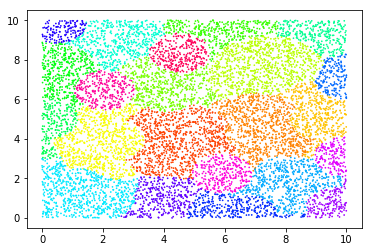

In [130]:
fig, ax = plt.subplots()
ax.scatter(x=x, y=y, color = cm.hsv(cluster), s = 0.5)

In [38]:
plt.show()